# iris_knn_classification

Classify iris flowers into one of three species (Setosa, Versicolor, Virginica) based on four features:

*   Sepal length
*   Sepal width
*   Petal length
*   Petal width

# *`Data Loading`*

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

print(iris.keys())
print(iris.feature_names)
print(iris.target_names)
print(iris.data[:5])
print(iris.target[:5])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [24]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = iris.target
species = iris.target_names

print(X.head())
print(species[y[:5]])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
['setosa' 'setosa' 'setosa' 'setosa' 'setosa']


# *`Data Cleaning`*

In [26]:
print(X.isnull().sum())
print(X.info())
print(X.describe())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
count         150.000000        150.000000         150.000000        150.000000
mean            5.843333          3.057333           3.758000          1.199333
std             0.828066          0.435866           1.765298          0.762238
min             4.300000          2.000000           1.000000          0.100000
25%             5.100000          2.800000           1.600

# *`Data Preprocessing`*

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [33]:
print(type(X))
print(type(X_scaled))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [32]:
print(scaler.mean_)
print(scaler.scale_)

[5.84333333 3.05733333 3.758      1.19933333]
[0.82530129 0.43441097 1.75940407 0.75969263]


<Axes: >

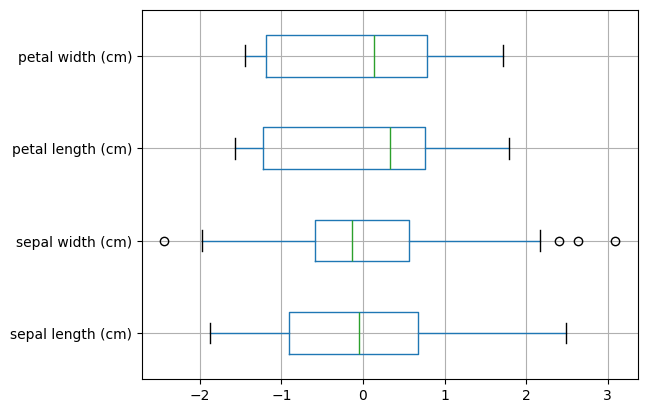

In [37]:
X_scaled_df = pd.DataFrame(X_scaled, columns=iris.feature_names)
X_scaled_df.boxplot(vert=False)

# *`Data Splitting`*

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,
                                                    random_state=42)

# *`Model Training`*

Train a K-Nearest Neighbors (KNN) classifier

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# *`Model Evaluation`*
Evaluate using metrics like accuracy, F1 score, precision, recall, and confusion matrix

In [52]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, \
    recall_score, confusion_matrix, classification_report

y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average='weighted'))
print('Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
F1 score: 0.9664109121909632
Precision: 0.9694444444444444
Recall: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



# *`Hyperparameter Tuning`*

In [53]:
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_test = knn.predict(X_test)
    print(f"k={k}, Accuracy={accuracy_score(y_test, y_pred_test):.2f}")

k=1, Accuracy=0.97
k=2, Accuracy=1.00
k=3, Accuracy=1.00
k=4, Accuracy=1.00
k=5, Accuracy=1.00
k=6, Accuracy=1.00
k=7, Accuracy=1.00
k=8, Accuracy=1.00
k=9, Accuracy=1.00
k=10, Accuracy=1.00


# *`Visualization`*

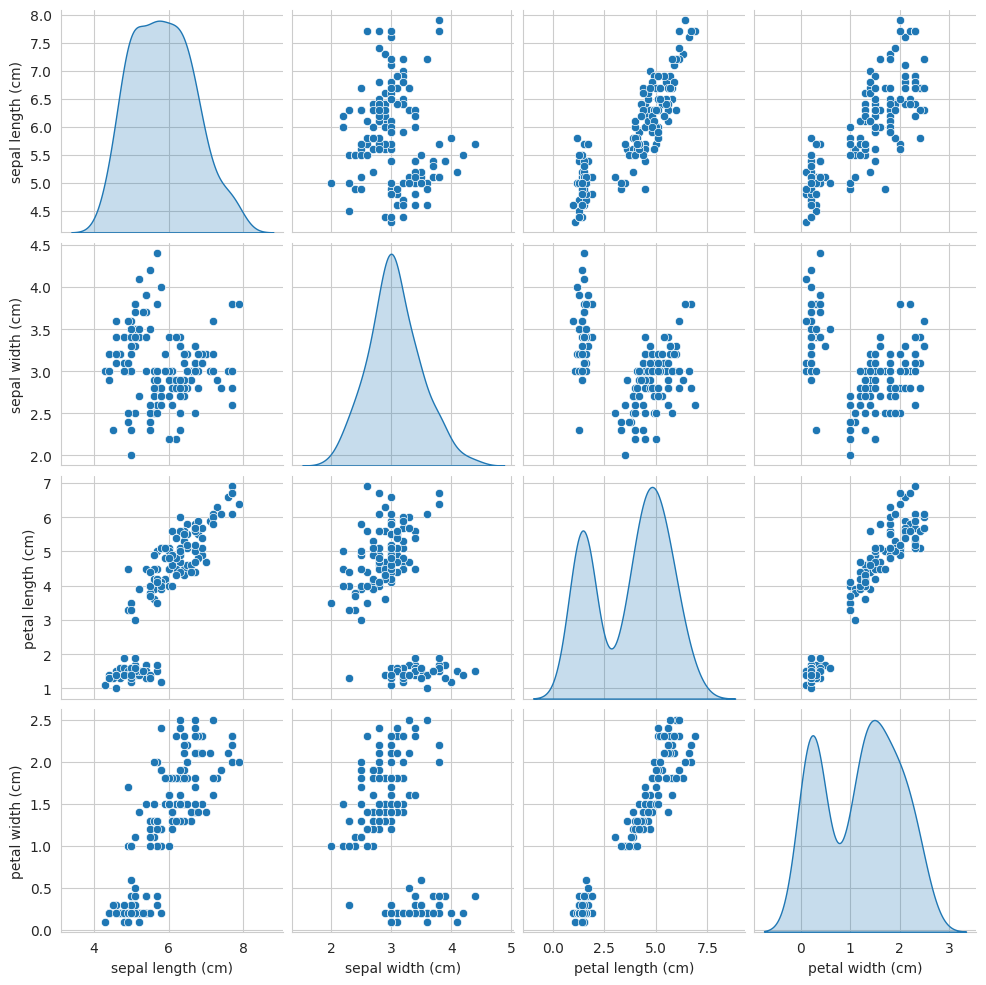

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot
sns.pairplot(pd.DataFrame(iris.data, columns=iris.feature_names), diag_kind='kde')
plt.show()

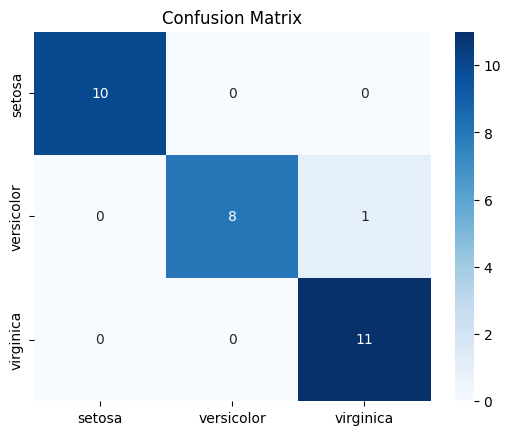

In [55]:
# Confusion Matrix Heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=species, yticklabels=species)
plt.title('Confusion Matrix')
plt.show()

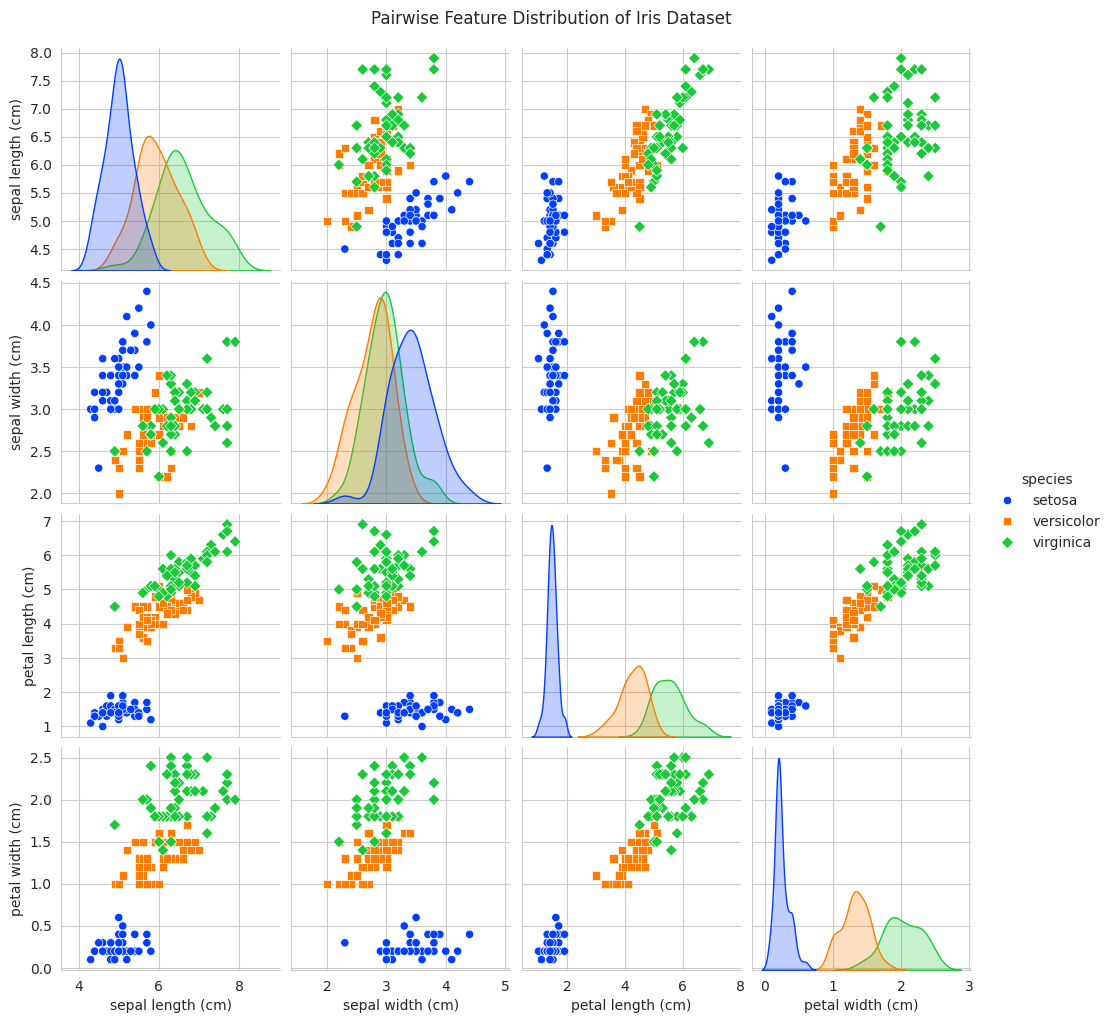

<ipython-input-64-9c0a01389b80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="deep")
<ipython-input-64-9c0a01389b80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="deep")
<ipython-input-64-9c0a01389b80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='species', y=feature, data=iris_df, palette="deep")
<ipython-input-64-9c0a01389b80>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v

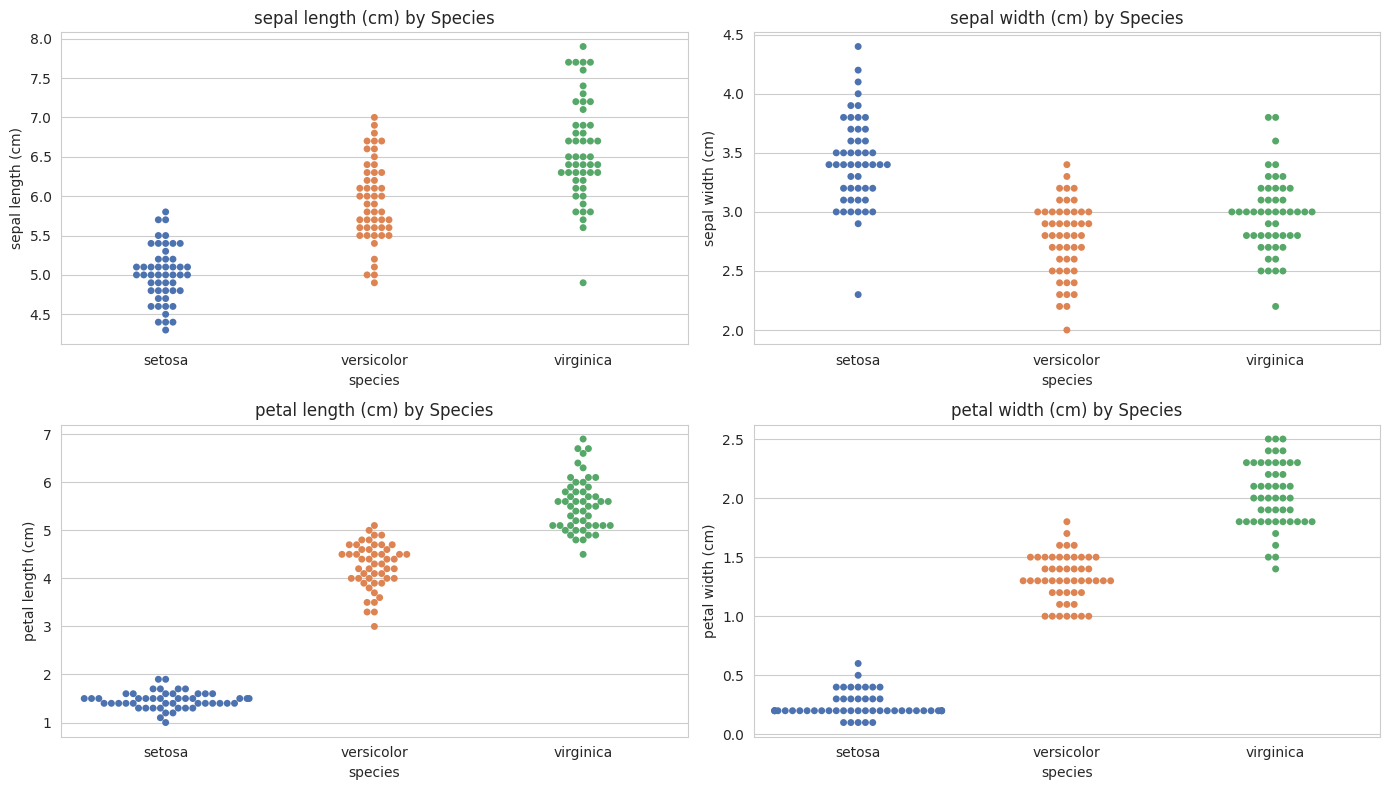

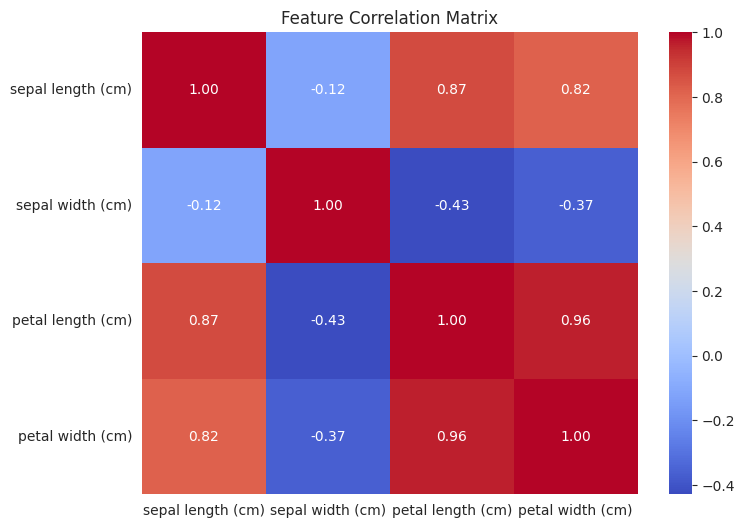

In [64]:
# Convert to DataFrame with species
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = [iris.target_names[label] for label in iris.target]

# Enhanced pairplot with hue and aesthetic tweaks
sns.pairplot(iris_df, hue='species', diag_kind="kde", palette="bright", markers=["o", "s", "D"])
plt.suptitle("Pairwise Feature Distribution of Iris Dataset", y=1.02)
plt.show()

# Swarmplot for each feature
plt.figure(figsize=(14, 8))
for i, feature in enumerate(iris.feature_names, 1):
    plt.subplot(2, 2, i)
    sns.swarmplot(x='species', y=feature, data=iris_df, palette="deep")
    plt.title(f"{feature} by Species")
plt.tight_layout()
plt.show()

# Heatmap of feature correlations
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.iloc[:, :-1].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()
